## Estadistica descriptiva

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_descriptiva = pd.read_excel("df_descriptiva.xlsx")

In [3]:
AU = data_descriptiva['Diagnostico_autismo']
counts = AU.value_counts()

labels = ['Autistic', 'Non autistic']
mapped_values = ['Non autistic' if val == 0 else 'Autistic' for val in AU]

## Histograma autista y alista

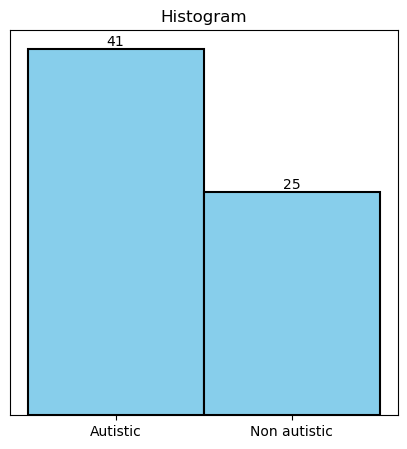

In [4]:
plt.figure(figsize=(5, 5))
plt.hist(mapped_values, bins=[-0.5, 0.5, 1.5], color='skyblue', linewidth=1.5, edgecolor='black') 

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Histogram')

# Establecer los nombres personalizados en el eje x
plt.xticks(ticks=[0, 1], labels=labels)
plt.yticks([])

plt.show()

## Histograma de edades

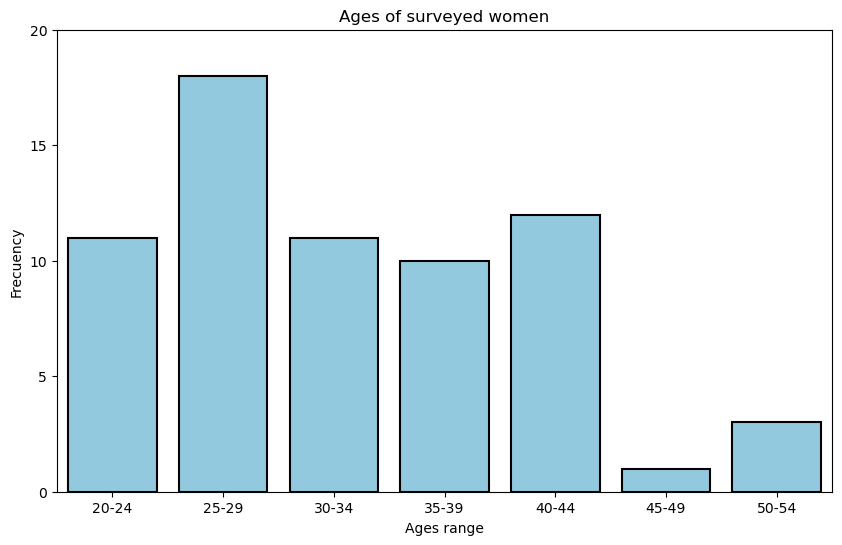

In [5]:
bins = range(20, 56, 5) 

labels = [f'{i}-{i+4}' for i in range(20, 55, 5)]  

data_descriptiva['Rango de edad'] = pd.cut(data_descriptiva['Ingresa tu edad actual'], bins=bins, labels=labels, right=False)

conteo_por_rango = data_descriptiva['Rango de edad'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, color='skyblue', linewidth=1.5, edgecolor='black')
plt.title('Ages of surveyed women')
plt.xlabel('Ages range')
plt.ylabel('Frecuency')
plt.yticks([0, 5, 10, 15, 20])
plt.show()

## Histograma de edad de diagnóstico

C:\Users\Catalina Valle Ribé\AppData\Local\Temp\ipykernel_2588\1816324293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Rango de edad de diagnóstico'] = pd.cut(df_filtrado['¿A que edad recibiste el diagnóstico de autismo?'], bins=bins_diagnostico, labels=labels_diagnostico, right=False)


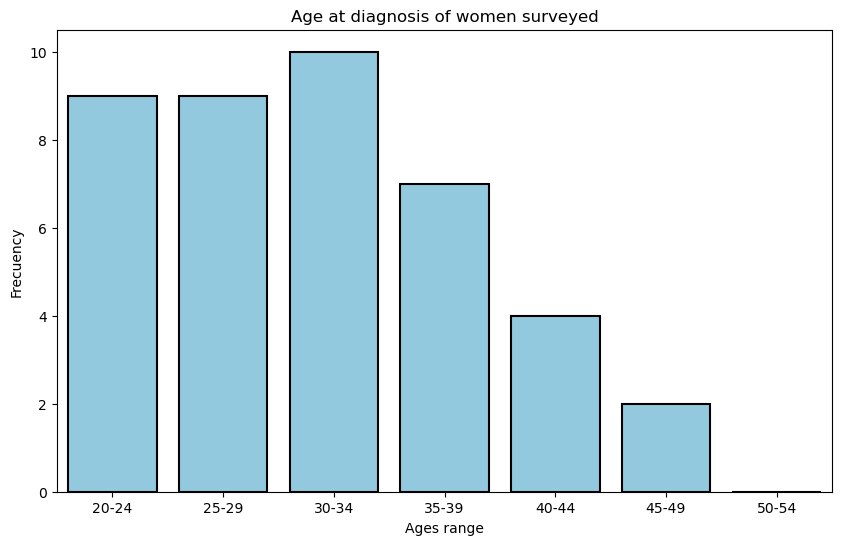

In [6]:
df_filtrado = data_descriptiva.loc[data_descriptiva['Diagnostico_autismo'] == 1]

bins_diagnostico = range(20, 56, 5)  

labels_diagnostico = [f'{i}-{i+4}' for i in range(20, 55, 5)]  

df_filtrado['Rango de edad de diagnóstico'] = pd.cut(df_filtrado['¿A que edad recibiste el diagnóstico de autismo?'], bins=bins_diagnostico, labels=labels_diagnostico, right=False)

conteo_por_rango_diagnostico = df_filtrado['Rango de edad de diagnóstico'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_por_rango_diagnostico.index, y=conteo_por_rango_diagnostico.values, color='skyblue', linewidth=1.5, edgecolor='black')
plt.title('Age at diagnosis of women surveyed')
plt.xlabel('Ages range')
plt.ylabel('Frecuency')
plt.yticks([0, 2, 4, 6, 8, 10])  
plt.show()

## Gráficos de edades

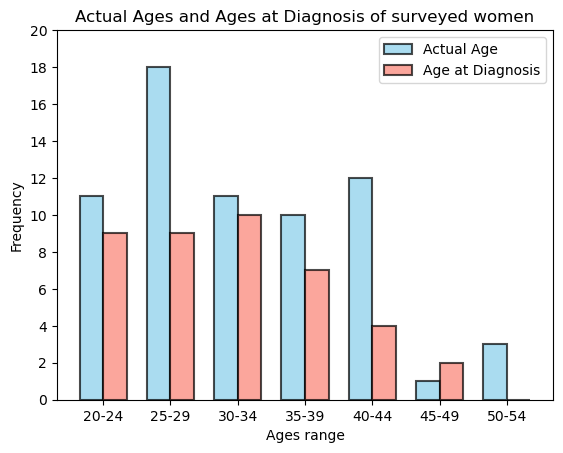

In [19]:
bins_diagnostico = range(20, 56, 5)
labels_diagnostico = [f'{i}-{i+4}' for i in range(20, 55, 5)]

bar_width = 0.35
r1 = np.arange(len(conteo_por_rango))
r2 = [x + bar_width for x in r1]

plt.bar(r1, conteo_por_rango.values, color='skyblue', alpha=0.7, width=bar_width, linewidth=1.5, edgecolor='black', label='Actual Age')
plt.bar(r2, conteo_por_rango_diagnostico.values, color='salmon', alpha=0.7, width=bar_width, linewidth=1.5, edgecolor='black', label='Age at Diagnosis')

plt.xlabel('Ages range')
plt.ylabel('Frequency')
plt.title('Actual Ages and Ages at Diagnosis of surveyed women')
plt.xticks([r + bar_width / 2 for r in range(len(conteo_por_rango))], conteo_por_rango.index)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])  
plt.legend()

plt.show()

## Histograma tiempo de diagnostico

C:\Users\Catalina Valle Ribé\AppData\Local\Temp\ipykernel_2588\3920203873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['año_diagnostico'] = 2023 - abs(df_filtrado['Ingresa tu edad actual'] - df_filtrado['¿A que edad recibiste el diagnóstico de autismo?'])
C:\Users\Catalina Valle Ribé\AppData\Local\Temp\ipykernel_2588\3920203873.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conteo_año_diagnostico = conteo_año_diagnostico.append(pd.Series([0], index=[2019]))


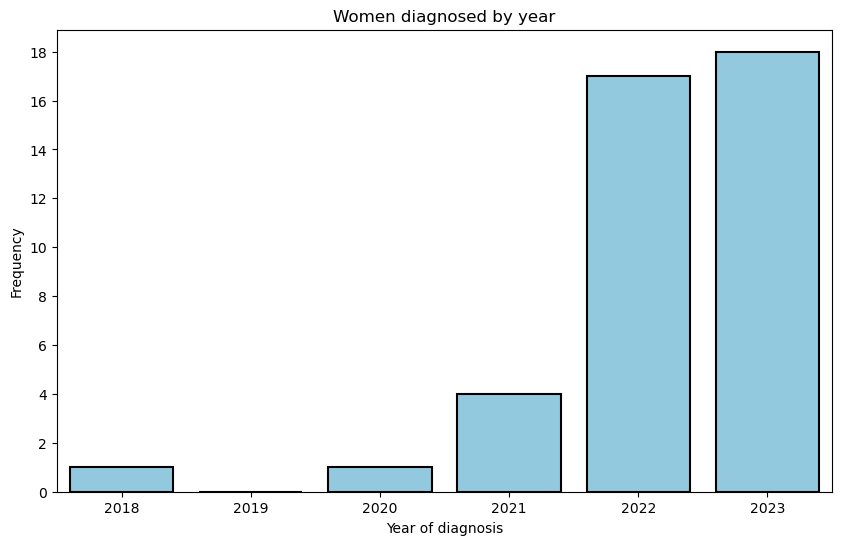

In [14]:
df_filtrado['año_diagnostico'] = 2023 - abs(df_filtrado['Ingresa tu edad actual'] - df_filtrado['¿A que edad recibiste el diagnóstico de autismo?'])

conteo_año_diagnostico = df_filtrado['año_diagnostico'].value_counts()
conteo_año_diagnostico = conteo_año_diagnostico.append(pd.Series([0], index=[2019]))
conteo_año_diagnostico = conteo_año_diagnostico.sort_index()

plt.figure(figsize=(10, 6))

sns.barplot(x=conteo_año_diagnostico.index, y=conteo_año_diagnostico.values, color='skyblue', linewidth=1.5, edgecolor='black')
plt.title('Women diagnosed by year')
plt.xlabel('Year of diagnosis')
plt.ylabel('Frequency')
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18]) 
plt.show()

## Otras Neurodivergencias

In [15]:
respuestas_separadas = df_filtrado['¿Alguna vez has sido diagnosticado/a con algunas de estas neurodivergencias?'].str.split(', ')

resumen = respuestas_separadas.explode().value_counts().reset_index()
resumen.columns = ['Respuesta', 'Frecuencia']

respuestas_a_eliminar = [
    'Sí',
    'Ansiedad social',
    'pero tengo AACC y sospecho ser TDAH también',
    'Altas Capacidades',
    'Tengo sospechas de Discalculia',
    'Dispraxia y TDAH'
]

resumen_filtrado = resumen[~resumen['Respuesta'].isin(respuestas_a_eliminar)]

print(resumen_filtrado[:-1])

                            Respuesta  Frecuencia
1                                  No          20
2                                TDAH          14
3  Trastorno por estrés postraumático           7
4       Trastorno obsesivo-compulsivo           5
5                            Dislexia           4
6                         Discalculia           3
7                           Dispraxia           2
8                                AACC           1
